Feature Names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target Names: ['malignant' 'benign']
Decision Tree Accuracy: 0.9087719298245615
Decision Tree Confusion Matrix:
 [[103   8]
 [ 18 156]]


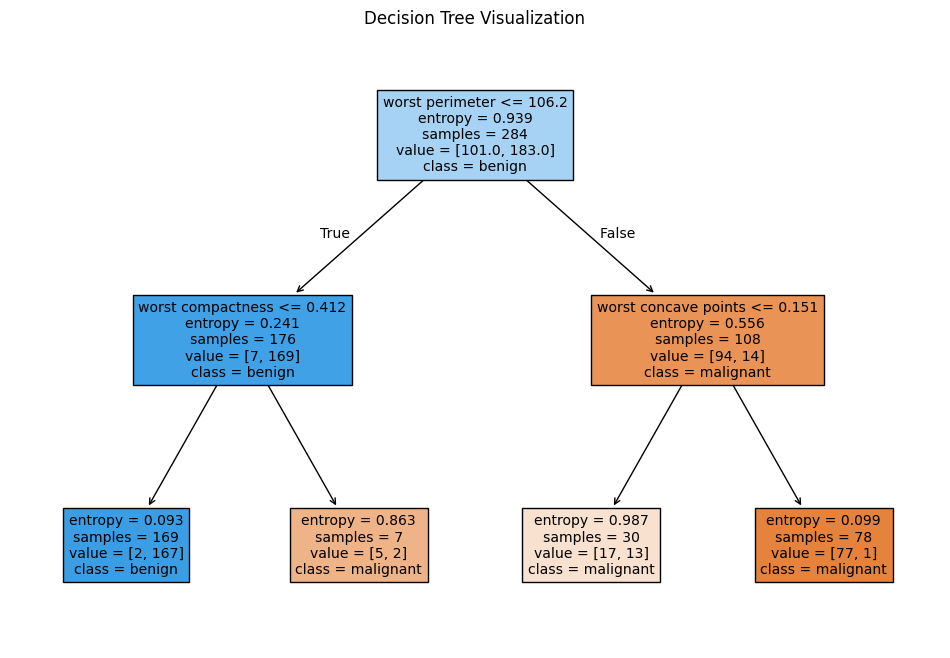

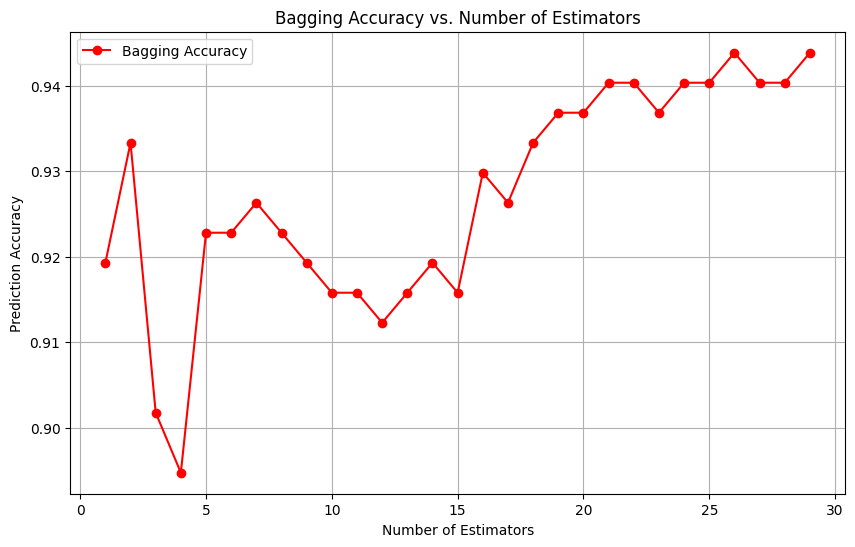

C:\Users\reymi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\reymi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\reymi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent th

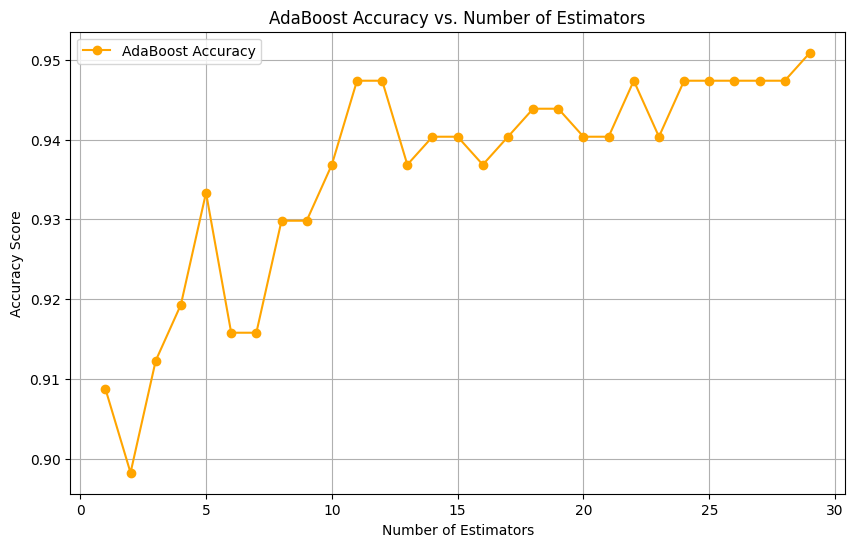

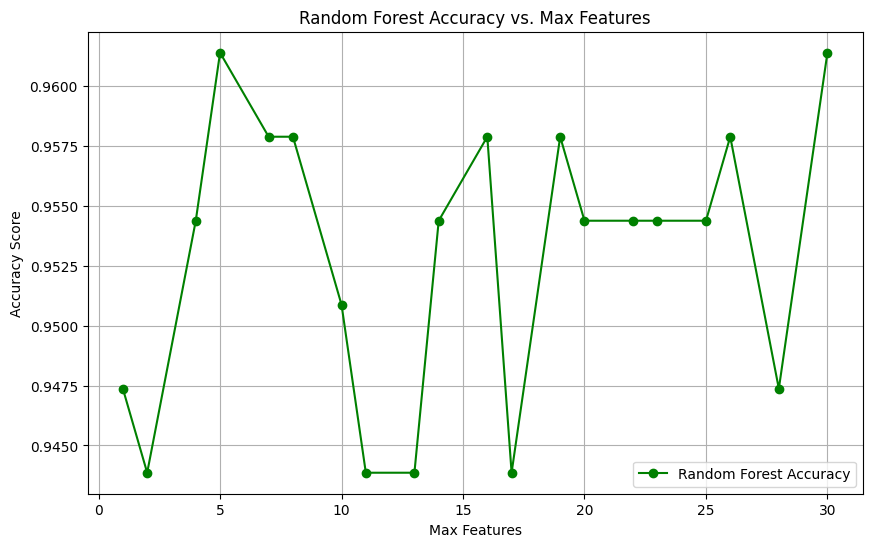

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np


class ClassifierEvaluator:
    def __init__(self):
        self.data = load_breast_cancer()
        self.x, self.y = self.data.data, self.data.target
        self.feature_names = self.data.feature_names
        self.target_names = self.data.target_names
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.x, self.y, test_size=0.5, random_state=42
        )
# a)Loading Breast Cancer data
bc_data = load_breast_cancer()
x, y = bc_data.data, bc_data.target

# b)Printing feature and target names
feature_names= bc_data.feature_names
target_names = bc_data.target_names

print("Feature Names:", feature_names)
print("Target Names:", target_names)

# c)Splitting the data into training and testing sets (half and half)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=8)

# g) Decision Tree Classifier
dt = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=8)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_confusion = confusion_matrix(y_test, y_pred_dt)

print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree Confusion Matrix:\n", dt_confusion)

# h) Decision Tree visual
# TODO: feature names are missing on the last nodes?
plt.figure(figsize=(12, 8))
plot_tree(dt, feature_names=feature_names, class_names=target_names, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

# i) Bagging
n_estimators_range = range(1, 30)
bagging_scores = []

for n_estimators in n_estimators_range:
    bagging = BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy', max_depth=2),
                                 n_estimators=n_estimators, random_state=8)
    bagging.fit(X_train, y_train)
    y_pred_bagging = bagging.predict(X_test)
    bagging_scores.append(accuracy_score(y_test, y_pred_bagging))

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, bagging_scores,color = 'red', marker = 'o', label='Bagging Accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('Prediction Accuracy')
plt.title('Bagging Accuracy vs. Number of Estimators')
plt.legend()
plt.grid()
plt.show()

# j) AdaBoost
boost_scores = []

for n_estimators in n_estimators_range:

    adaboost = AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy', max_depth=2),
                                  n_estimators=n_estimators, random_state=8)
    adaboost.fit(X_train, y_train)
    y_pred_boost = adaboost.predict(X_test)
    boost_scores.append(accuracy_score(y_test, y_pred_boost))

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, boost_scores, marker='o', label='AdaBoost Accuracy', color='orange')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy Score')
plt.title('AdaBoost Accuracy vs. Number of Estimators')
plt.legend()
plt.grid()
plt.show()

# k) Random Forest

max_features_range = np.linspace(1, x.shape[1], 20, dtype=int)
forest_scores = []

for max_features in max_features_range:

    random_forest = RandomForestClassifier(n_estimators=100, max_features=max_features, random_state=8)

    random_forest.fit(X_train, y_train)

    y_pred_forest = random_forest.predict(X_test)

    forest_scores.append(accuracy_score(y_test, y_pred_forest))


plt.figure(figsize=(10, 6))
plt.plot(max_features_range, forest_scores, marker='o', label='Random Forest Accuracy', color='green')
plt.xlabel('Max Features')
plt.ylabel('Accuracy Score')
plt.title('Random Forest Accuracy vs. Max Features')
plt.legend()
plt.grid()
plt.show()
